In [37]:
# Set up my declerations
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Create Engine
###### _Note: I have also removed the username and password from the connection string_

In [5]:
# Create Engine
engine = create_engine('postgresql://USER:PW@localhost:5432/SQL_HW')
connection = engine.connect()

In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [7]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [9]:
# Need the Titles and the Salaries tables. Assign the classes to variables
Salaries = Base.classes.Salaries
Titles = Base.classes.Titles

In [13]:
# Create a session
session = Session(engine)

In [14]:
# Identify which columns to join 
Salaries_row = session.query(Salaries).first()
Salaries_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x286978b0a20>,
 'to_date': datetime.date(1987, 6, 26),
 'salary': 60117,
 'from_date': datetime.date(1986, 6, 26),
 'emp_no': 10001}

In [15]:
# Identify which columns to join 
Titles_row = session.query(Salaries).first()
Titles_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x286978b0a20>,
 'to_date': datetime.date(1987, 6, 26),
 'salary': 60117,
 'from_date': datetime.date(1986, 6, 26),
 'emp_no': 10001}

In [16]:
# Convert SQL to DF for the charts
Salaries_df = pd.read_sql(session.query(Salaries).statement,session.bind) 
Titles_df = pd.read_sql(session.query(Titles).statement,session.bind) 

In [17]:
# Merge the two df so we can come up with average salary per title
combined_df = Salaries_df.merge(Titles_df,how='inner',on='emp_no')
combined_df.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [18]:
# Group by title and capture the average salary
Avg_per_title = combined_df.groupby('title')['salary'].mean().reset_index()

In [19]:
Avg_per_title

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


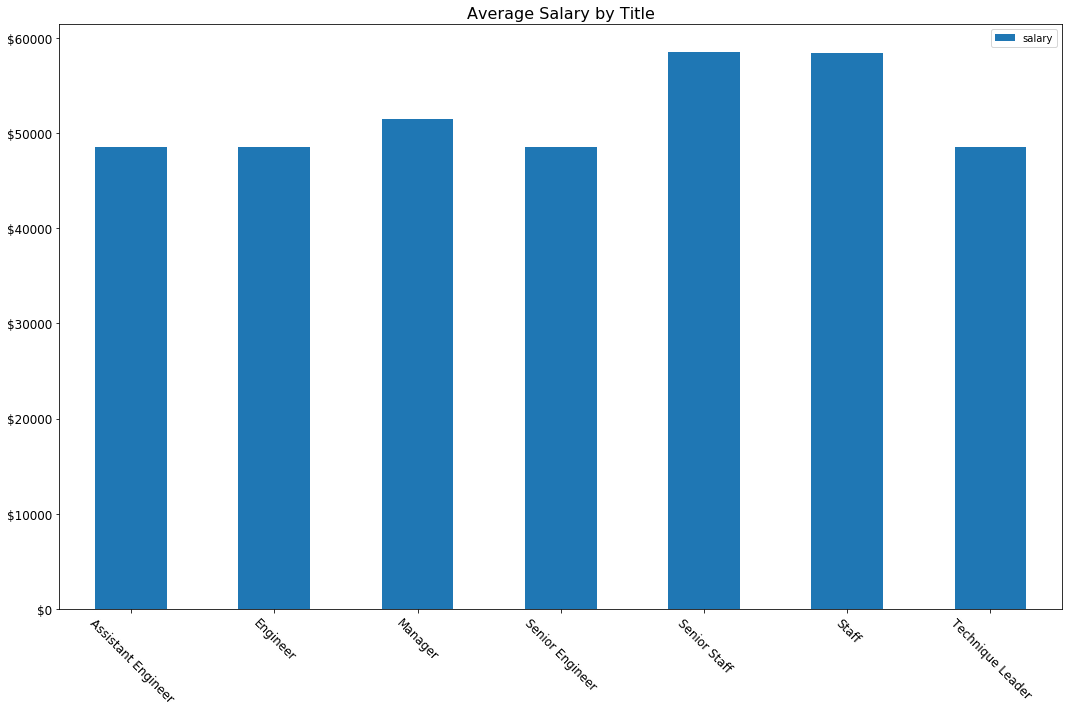

In [57]:
# Define the list for the x-axis and plot the bar chart
title = Avg_per_title['title'].tolist()
ax = Avg_per_title['salary'].plot(kind='bar',figsize=(15, 10), legend=True, fontsize=12)
ax.set_title("Average Salary by Title",fontdict={'fontsize': 16, 'fontweight': 'medium'}) 
ax.set_xticklabels(title, rotation='vertical', fontsize=12)

# Format the vertical access in currency format
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)

# Adjust the x-ticker labels by -45 degrees for easier reading
plt.xticks(rotation=-45)
plt.tight_layout()
plt.show()


